Optimal Total LNG: 850.0, Optimal Peak Intake: 195.0


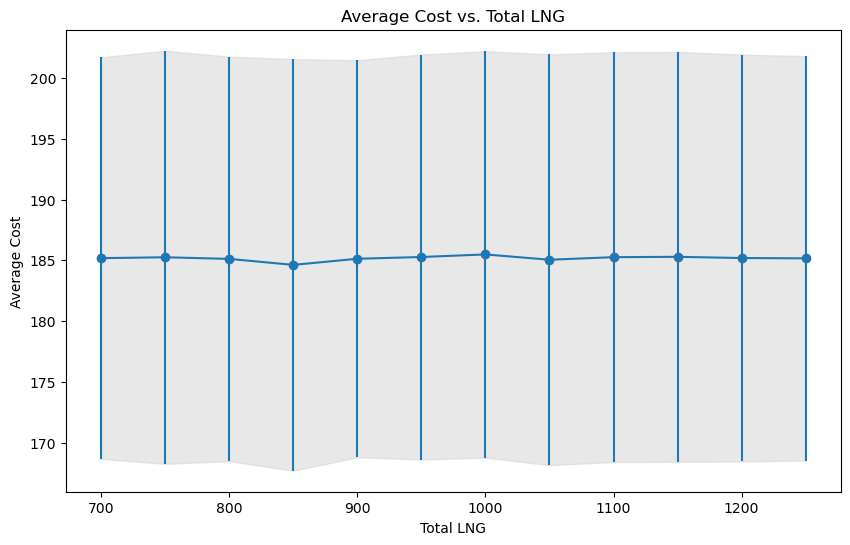

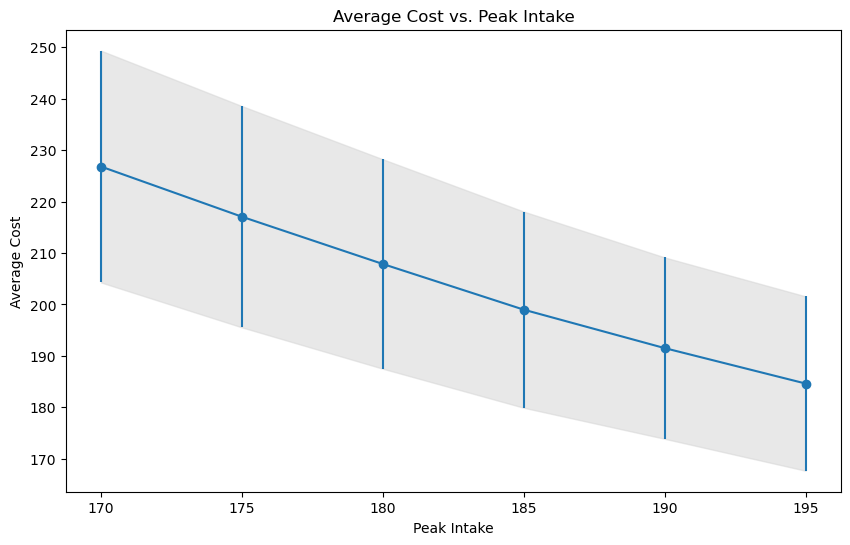

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming demand_data and intake_price_data are loaded from provided CSV URLs
demand_data_url = 'https://raw.githubusercontent.com/nosadchiy/public/main/demand.csv'
intake_price_data_url = 'https://raw.githubusercontent.com/nosadchiy/public/main/intake_price.csv'
demand_data = pd.read_csv(demand_data_url)
intake_price_data = pd.read_csv(intake_price_data_url)

# Simulation parameters
num_draws = 5000
total_lng_range = np.arange(700, 1300, 50)
peak_intake_range = np.arange(170, 200, 5)
calng_price = 7.50  # USD per MMcf

# Function to simulate demand scenarios
def simulate_demand(num_scenarios, mean=144, std_dev=59):
    return np.random.normal(mean, std_dev, num_scenarios)

# Cost calculation for each scenario
def calculate_scenario_cost(demand, total_lng, peak_intake, calng_price):
    pipeline_demand = np.minimum(demand, peak_intake)
    lng_demand = np.maximum(demand - peak_intake, 0)
    
    # Assuming pipeline cost function from provided details or a placeholder
    pipeline_cost = pipeline_demand * 1.0  # Placeholder for actual pipeline cost calculation
    lng_cost = np.minimum(lng_demand, total_lng) * calng_price
    
    total_cost = pipeline_cost + lng_cost
    return total_cost

# Optimization loop to find the optimal settings
results = []

for total_lng in total_lng_range:
    for peak_intake in peak_intake_range:
        scenario_costs = []
        for _ in range(num_draws):
            simulated_demand = simulate_demand(91)  # Simulate for 91 days
            scenario_cost = calculate_scenario_cost(simulated_demand, total_lng, peak_intake, calng_price)
            scenario_costs.append(np.mean(scenario_cost))
        avg_cost = np.mean(scenario_costs)
        std_dev_cost = np.std(scenario_costs)
        results.append((total_lng, peak_intake, avg_cost, std_dev_cost))

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results, columns=['Total LNG', 'Peak Intake', 'Avg Cost', 'Std Dev'])

# Find optimal parameters
optimal_row = results_df.loc[results_df['Avg Cost'].idxmin()]
optimal_total_lng = optimal_row['Total LNG']
optimal_peak_intake = optimal_row['Peak Intake']

print(f"Optimal Total LNG: {optimal_total_lng}, Optimal Peak Intake: {optimal_peak_intake}")

# Plotting
def plot_results(x, y, err, title, xlabel, ylabel='Average Cost'):
    plt.figure(figsize=(10, 6))
    plt.errorbar(x, y, yerr=err, fmt='-o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.fill_between(x, y-err, y+err, color='lightgray', alpha=0.5)
    plt.show()

# Average Cost vs. Total LNG (at optimal peak intake)
subset = results_df[results_df['Peak Intake'] == optimal_peak_intake]
plot_results(subset['Total LNG'], subset['Avg Cost'], subset['Std Dev'], 'Average Cost vs. Total LNG', 'Total LNG')

# Average Cost vs. Peak Intake (at optimal total LNG)
subset = results_df[results_df['Total LNG'] == optimal_total_lng]
plot_results(subset['Peak Intake'], subset['Avg Cost'], subset['Std Dev'], 'Average Cost vs. Peak Intake', 'Peak Intake')
